### Criando o dataset para a análise

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
#leitura dos dados
#KAGGLE
#df_site1 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Notas_deputados/datasets/raw_data/legislaBr_raw.csv') 
#df_site2 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Notas_deputados/datasets/raw_data/politicos-org_raw.csv')

#VSCODE NotebookN5
df_site1 = pd.read_csv('I:/My Drive/Colab_Notebooks/Notas_deputados/datasets/raw_data/legislaBr_raw.csv') 
df_site2 = pd.read_csv('I:/My Drive/Colab_Notebooks/Notas_deputados/datasets/raw_data/politicos-org_raw.csv')

In [3]:
#tratamento inicial dos dataframes
del df_site1['Unnamed: 0']

In [4]:
#Visualizando
display(df_site1.head())
display(df_site2.head())

,nome,estado,partido,n_prod_leg,n_fisc,n_mobi,n_alin_partd
0,abilio santana,Bahia,PSC,1.7,0.0,0.9,9.1
1,abou anni,São Paulo,UNIÃO,3.8,0.9,2.4,6.4
2,acacio favacho,Amapá,MDB,2.6,0.2,2.1,6.4
3,adolfo viana,Bahia,PSDB,2.8,0.9,2.4,5.5
4,adriana ventura,São Paulo,NOVO,6.4,2.9,7.3,10.0


,nome,nota
0,abou anni,6.55
1,acacio favacho,6.12
2,adolfo viana,6.82
3,adriana ventura,8.24
4,adriano do baldy,6.82


Foi verificado que alguns (78) deputados não estão presentes na lista dos dois sites, <br>
sendo assim foi optado por removê-los da análise.

In [5]:
# criando novo dataframe sem valores não comuns entre as tabelas
notas_dep = pd.merge(df_site1, df_site2)
notas_dep = notas_dep.rename(columns={'nota': 'nota_site2'})

In [6]:
# criando coluna com o valor da média ponderada entre 
# as notas do primeiro site
notas_dep.insert(7, 'avg_site1', (notas_dep['n_prod_leg']*8 
                             + notas_dep['n_fisc']*5 + notas_dep['n_mobi']*3 
                             + notas_dep['n_alin_partd']*1)/17)

In [7]:
notas_dep.head()

,nome,estado,partido,n_prod_leg,n_fisc,n_mobi,n_alin_partd,avg_site1,nota_site2
0,abou anni,São Paulo,UNIÃO,3.8,0.9,2.4,6.4,2.852941,6.55
1,acacio favacho,Amapá,MDB,2.6,0.2,2.1,6.4,2.029412,6.12
2,adolfo viana,Bahia,PSDB,2.8,0.9,2.4,5.5,2.329412,6.82
3,adriana ventura,São Paulo,NOVO,6.4,2.9,7.3,10.0,5.741176,8.24
4,adriano do baldy,Goiás,PP,2.3,0.0,2.1,10.0,2.041176,6.82


In [8]:
notas_dep.shape

(488, 9)

In [9]:
notas_dep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nome          488 non-null    object 
 1   estado        488 non-null    object 
 2   partido       488 non-null    object 
 3   n_prod_leg    488 non-null    float64
 4   n_fisc        488 non-null    float64
 5   n_mobi        488 non-null    float64
 6   n_alin_partd  488 non-null    float64
 7   avg_site1     488 non-null    float64
 8   nota_site2    488 non-null    float64
dtypes: float64(6), object(3)
memory usage: 34.4+ KB


In [10]:
notas_dep['n_prod_leg'] = notas_dep['n_prod_leg'].astype('float32')
notas_dep['n_fisc'] = notas_dep['n_fisc'].astype('float32')
notas_dep['n_mobi'] = notas_dep['n_mobi'].astype('float32')
notas_dep['n_alin_partd'] = notas_dep['n_alin_partd'].astype('float32')
notas_dep['avg_site1'] = notas_dep['avg_site1'].astype('float32')
notas_dep['nota_site2'] = notas_dep['nota_site2'].astype('float32')

Através da análise bivariada entre a média do LegislaBr (https://indice.legislabrasil.org/public/) e o Politicos.org (https://www.politicos.org.br/) há indicios que mostram uma correlação negativa entre eles. Ou seja, deputados que tem nota alta no LegislaBr tendem a ter nota baixa no Politicos.org e vice-versa.

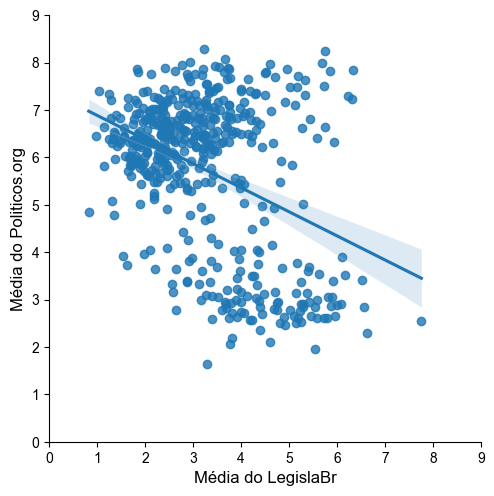

In [11]:
#configurando plot
g1 = sns.lmplot(x='avg_site1', 
                y='nota_site2', 
                data=notas_dep, 
                height=5, aspect=1
                )

#dpi
sns.set(rc={"figure.dpi":100})

#axis
plt.xlabel('Média do LegislaBr', fontsize=12)
plt.ylabel('Média do Politicos.org', fontsize=12)
plt.xticks(range(0,10, 1))
plt.yticks(range(0,10, 1))

plt.show()

In [12]:
(notas_dep.select_dtypes(include=['number'])).corr()

,n_prod_leg,n_fisc,n_mobi,n_alin_partd,avg_site1,nota_site2
n_prod_leg,1.000000,0.557857,0.807150,-0.163963,0.933176,-0.234504
n_fisc,0.557857,1.000000,0.636893,0.010469,0.767392,-0.481723
n_mobi,0.807150,0.636893,1.000000,-0.042569,0.903175,-0.401769
n_alin_partd,-0.163963,0.010469,-0.042569,1.000000,0.029714,-0.160582
avg_site1,0.933176,0.767392,0.903175,0.029714,1.000000,-0.394034
nota_site2,-0.234504,-0.481723,-0.401769,-0.160582,-0.394034,1.000000


Um quesito chamou a atenção nessa análise. Depois de analisar a metodologia usada pelo politicos.org percebe-se que suas posições podem estar mais alinhadas com partidos de Direita. Uma das nots é compostas de acordo com "o posicionamento dos parlamentares nas principais votações do Congresso". Segundo o site "O aproveitamento de acerto nos votos reflete a nota do político neste critério". Apesar do Conselho ser composto por 32 pessoas não é exposto como ele é formado, qual a diversidade do corpo, se é representativo com a população interessada, no caso a população brasileira. 
<br><br>
Com isso surgiu a curiosidade de verificar a nota por ideologia do partido dos deputados. Em resumo, classificando o partido em Esquerda, Centro e Direita.



### Criando nova coluna para classificação ideólogica dos partidos. <br>
Para tal, foi utilizida classificação dada pelo jornal Folha na seguinte matéria:
https://www1.folha.uol.com.br/poder/2022/09/o-que-faz-um-partido-ser-de-direita-ou-esquerda-folha-cria-metrica-que-posiciona-legendas.shtml
    
Esse ranking levou em consideração o comportamento do partido de acordo com 7 quesitos: 
Votação dos deputados na legenda da câmara; coligações; autodeclaração dos congressistas; 
frente parlamentares, opinião de especialistas, migração partidária e o 
posicionamento no GPS Ideológico da Folha (baseado em seguidores do Twitter, atualizado em 2022).
A classificação ficou a seguinte: <br>
<br>
Esquerda: PCO, PSTU, PSOL, UP, PT, PCB, REDE, PCdoB, PSB, PV e PDT<br>
<br>
Centro: Solidariedade, Cidadania, Avante, PSD, PROS, MDB, Agir, PSDB, Podemos e PMN<br>
<br>
Direita: Rebuplicanos, DC, PRTB, PMB, PP, PTB, União, Patriota, PSC, PL e Novo<br>
<br>
As listas foram reduzidas a somente partidos contidos nos dataset gerados pelo webscraping.

In [13]:
#partidos 
esquerda = ['PSOL', 'PT', 'REDE', 'PCdoB', 'PSB', 'PV', 'PDT']
centro = ['SOLIDARIEDADE', 'CIDADANIA', 'AVANTE', 'PSD', 'PROS', 'MDB', 'PSDB', 'PODE']
direita = ['REPUBLICANOS', 'PP', 'PTB', 'UNIÃO', 'PATRIOTA', 'PSC', 'PL', 'NOVO']

ideologia = ['esquerda' if x in esquerda else 'direita' if x in direita else 'centro' for x in notas_dep['partido']]

notas_dep.insert(3, 'ideologia', ideologia)

Graficamente também fica visível a suposição anteriormente feita, de que a **nota depende** da ideologia do partido em que o deputado está.

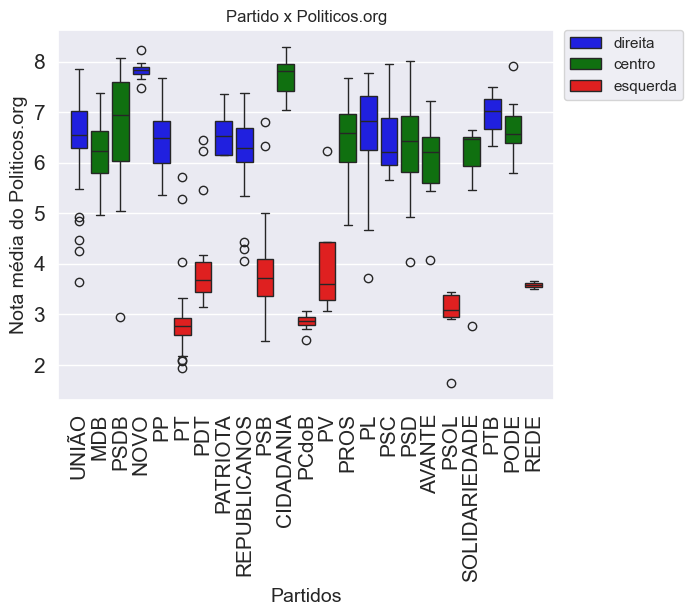

In [14]:
#boxplot
plt.title('Partido x Politicos.org')
graph_boxp = sns.boxplot(data=notas_dep, 
                         x='partido', y='nota_site2', 
                         hue = notas_dep['ideologia'], palette=["blue", "green", "red"],
                         dodge =False
                         )

# graph_boxp.xaxis.grid(True)
graph_boxp.set_xlabel("Partidos",fontsize=14)
graph_boxp.set_ylabel("Nota média do Politicos.org",fontsize=14)
plt.xticks(rotation='vertical', size=15)
plt.yticks(size=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.rcParams['figure.figsize'] = (13,10)
graph_boxp.set_xlim(right=23, left=-1)

plt.show()

Comparando as médias por ideologia também é constatado que Centro e Direita tem notas similares e opostas a Esquerda. No LegislaBr o primeiro grupo tem notas mais baixas que o segundo grupo, acontecendo o inverso no Politicos.org.

In [15]:
# Filtrar apenas colunas numéricas
df_numeric = notas_dep.select_dtypes(include='number')

# Adicionar a coluna 'ideologia' para poder agrupar
df_numeric['ideologia'] = notas_dep['ideologia']

# Fazer o agrupamento e calcular a média
site1_vs_site2 = df_numeric.groupby('ideologia').mean()

# Dropando colunas específicas
site1_vs_site2.drop(['n_prod_leg', 'n_fisc', 'n_mobi', 'n_alin_partd'], 
                    axis=1, inplace=True, errors='ignore')

# Exibe a tabela
print(site1_vs_site2)

           avg_site1  nota_site2
ideologia                       
centro      2.750615    6.406418
direita     2.971302    6.540544
esquerda    4.370895    3.322435


Pela análise dos gráficos é possivel ver que as notas dos deputados estão agrupadas de acordo com a ideologia do partido ao qual pertencem, com presenças de alguns outliers.

O gráfico seguinte mostra como estão distribuidas as densidades das médias para cada site. Para o LegislaBr as notas para partidos de Direita e Centro estão concentradas com notas entre 0 e 4, e exibem maior densidade. Já os politicos de partidos de esquerda tem densidade menor e estão mais concentrados com notas entre 2 e 6.
<br>
Para o Politicos.org os partidos de Direita e Centro estão concentradas em notas entre 6 e 8, equanto que para partidos de Esquerda estão concentradas entre 2 e 4.

Já é possível perceber que a metodologia adotada por cada site divide os grupos e a nota de cada deputado se torna dependente da ideologia que é o partido.

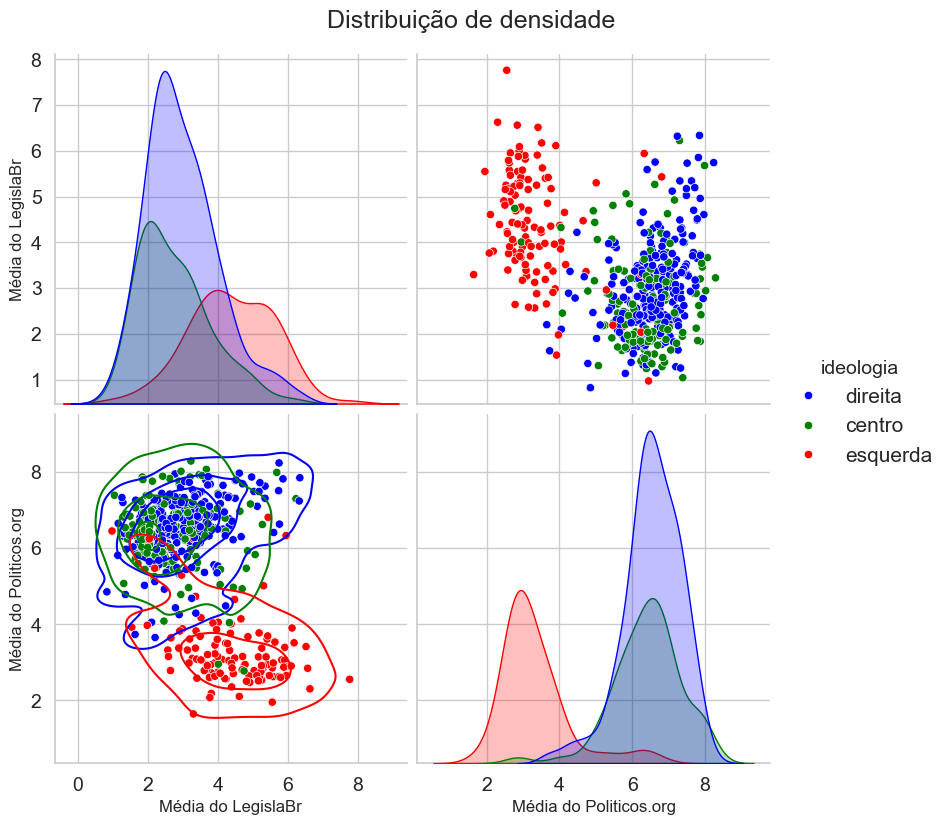

In [16]:
sns.set_style("whitegrid")
x_vars = ['avg_site1', 'nota_site2']
y_vars = ['avg_site1', 'nota_site2']

palette = {"direita":"blue", "centro":"green", "esquerda":"red"}

rc = {'xtick.labelsize': 14
      , 'ytick.labelsize': 14
      , 'legend.fontsize': 15
      , 'font.size': 15
      , 'legend.title_fontsize': 14
      }

with sns.plotting_context(rc = rc):
  g_1 = sns.pairplot(notas_dep, hue="ideologia", 
                    height=4, 
                    palette=palette,  
                    x_vars=x_vars, y_vars=y_vars,
                    )

g_1.map_lower(sns.kdeplot, levels=4, color=".2")
g_1.fig.suptitle("Distribuição de densidade", size=18, y=1.03)

g_1.axes[0][0].set_ylabel('Média do LegislaBr')
g_1.axes[1][0].set_ylabel('Média do Politicos.org')
g_1.axes[1][1].set_xlabel('Média do Politicos.org')
g_1.axes[1][0].set_xlabel('Média do LegislaBr')

plt.show()

É também feita uma análise das notas que compõe a média do LegislaBr.
<br>
Onde há indicios de dominio das maiores notas para partidos com ideologias de esquerda.

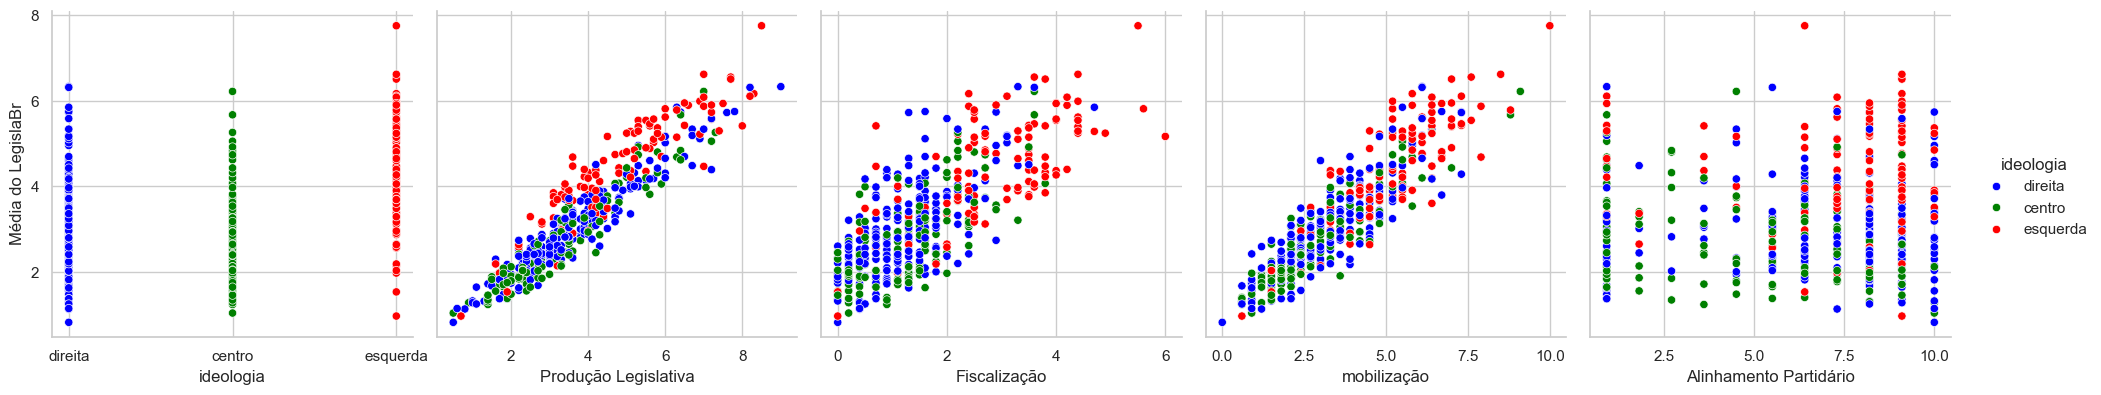

In [17]:
sns.set_style("whitegrid");
x_vars_2 = ['ideologia', 'n_prod_leg', 'n_fisc', 'n_mobi', 'n_alin_partd']
y_vars_2 = ['avg_site1']
graph_2 = sns.pairplot(notas_dep, hue="ideologia", height=4, 
                       palette=["blue", "green", "red"], x_vars=x_vars_2, 
                       y_vars=y_vars_2)

substituir_grp = {'avg_site1': 'média do LegislaBr', 'n_prod_leg':'Produção Legislativa', \
                  'n_fisc':'Fiscalização', 'n_mobi':'mobilização', \
                    'n_alin_partd':'Alinhamento Partidário'}

for j in range (5):
    xlabel = graph_2.axes[0][j].get_xlabel()
    if xlabel in substituir_grp.keys():
        graph_2.axes[0][j].set_xlabel(substituir_grp[xlabel])



graph_2.axes[0][0].set_ylabel('Média do LegislaBr')
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = (15,20)
plt.show()

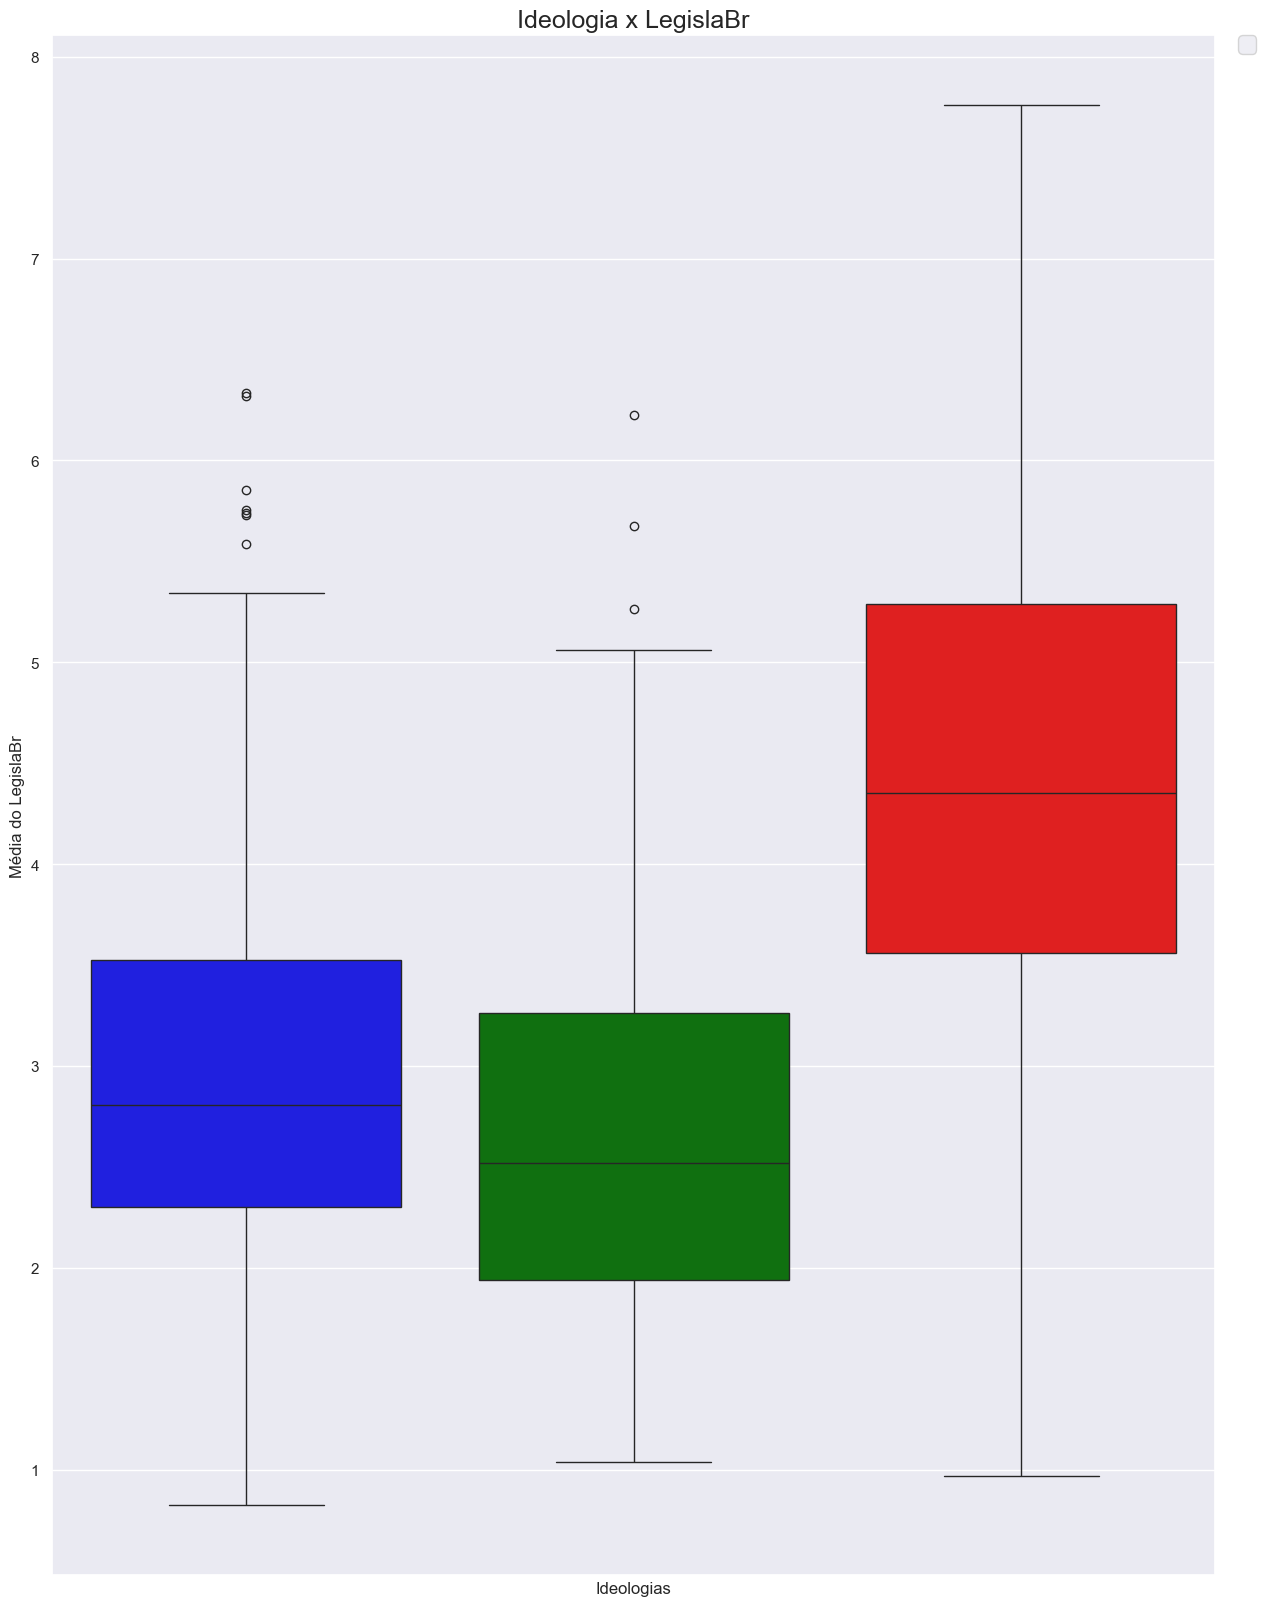

In [18]:
#boxplot
plt.title('Ideologia x LegislaBr')
graph_boxp_s1 = sns.boxplot(data=notas_dep, 
                            x='ideologia', y='avg_site1', 
                            hue = notas_dep['ideologia'], palette=palette
                            )

graph_boxp_s1.set_xlabel("Partidos",fontsize=12)
graph_boxp_s1.set_ylabel("Site 1",fontsize=12)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    
plt.yticks(size=11)
graph_boxp_s1.set_xlabel("Ideologias",fontsize=12)
graph_boxp_s1.set_ylabel("Média do LegislaBr",fontsize=12)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.rcParams['figure.figsize'] = (7,6)
plt.show()

Comparando as relações entre notas dos dois site percebe-se que as notas estão bem separadas a depender da Ideologia do partido.<br>
Vale salientar que de acordo com a metodolgia do LegislaBr as notas são atribuidas de acordo as ações dos deputados, que são:<br>
1. Apresentação de projetos; <br>
2. Protagonismo de autoria; <br>
3. Relevância das autorias (nesse é feita uma seleção do quão o projeto é importante, sendo notas mais altas para projetos que impactam em políticas materiais e notas mais baixa para projetos relacionados às questões subjetivas como nomeação de estradas e condecorações, por exemplo); <br>
4. Nº de votos em separado apresentados; <br>
5. Nº de substitutivos apresentados; <br>
6. Nº de relatorias apresentadas; <br>
7. Nº presença em Plenário; <br>
8. Emendas de Plenário; <br>
9. Nº de solicitações de informações protocoladas; <br>
10. Proposta de fiscalização e controle protocoladas; <br>
11. Recebimento de emendas parlamentares (emendas empenhadas); <br>
12. Emendas de Medidas Provisórias; <br>
13. Emendas de orçamento; <br>
14. Projetos de autoria com status especial; <br>
15. Cargos ocupados na legislatura; <br>
16. Nº de requerimentos de Audiência Pública; <br>
17. Desvios da posição majoritária do partido em votações.

Analisando os deputados pela orientação ideológica do partido vemos comportamentos diferentes. Para a direita uma correlação  positiva com uma dispersão menor que nas outras duas categorias. <br>
Para os partidos de Centro vemos uma correlação fraca negativa com dispersão maior que para os partidos de Direita. <br>
Já para os partidos tidos como de Esquerda mostra correlação negativa com dispersão alta também. <br>
As dispersões mais altas são nos valores mais extremos, onde é possível perceber muitos outliers presentes em todas as ideologias. Sendo que na ideologia Direita os outliers estão mais próximos da linha de regressão.

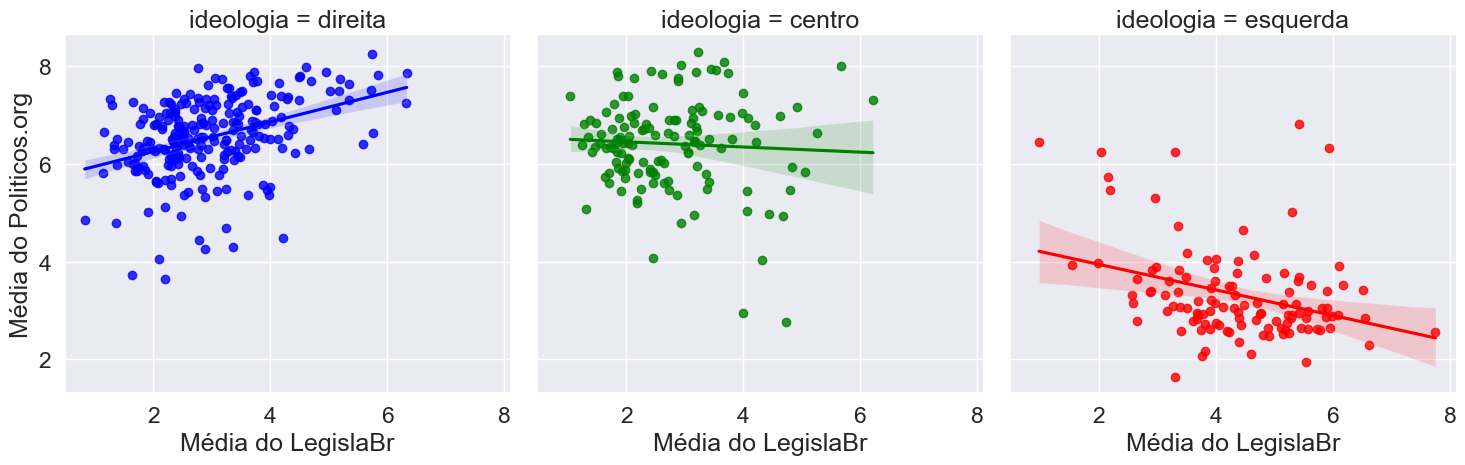

In [19]:
ax = sns.lmplot(x="avg_site1", y="nota_site2", 
                col = 'ideologia', hue = 'ideologia', 
                data=notas_dep, 
                palette=["blue", "green", "red"]
                )

substituir = {'avg_site1': 'Média do LegislaBr'}

for j in range (3):
    xlabel = ax.axes[0][j].get_xlabel()
    if xlabel in substituir.keys():
        ax.axes[0][j].set_xlabel(substituir[xlabel])
        
ax.axes[0][0].set_ylabel('Média do Politicos.org')

plt.show()

In [20]:
#Valor da correlação de Pearson para cada ideologia
df_plot = pd.DataFrame(ax.data)

for name, group in df_plot.groupby('ideologia'):
    corr = group['avg_site1'].corr(group['nota_site2'])
    print(f'Grupo {name}: {round(corr, 2)}')

Grupo centro: -0.06
Grupo direita: 0.39
Grupo esquerda: -0.33


Adicionando a feature região, que específica de qual regiao do Brasil é o deputado¶

In [21]:
#regiões do Brasil e seus estados
norte = ['Amazonas', 'Roraima', 'Amapá', 'Pará', 'Tocantins', 'Rondônia', 'Acre']
nordeste = ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Pernambuco', 'Paraíba',\
            'Sergipe', 'Alagoas', 'Bahia']
centro_oeste = ['Mato Grosso', 'Mato Grosso do Sul', 'Goiás', 'Distrito Federal']
sudeste = ['São Paulo', 'Rio de Janeiro', 'Espírito Santo', 'Minas Gerais']
sul = ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
regiao = []

In [22]:
regiao = ['norte' if x in norte else 'nordeste' if x in nordeste else 'centro oeste' if x in centro_oeste\
          else 'sudeste' if x in sudeste else 'sul' for x in notas_dep.estado]

In [23]:
notas_dep.insert(2, 'regiao', regiao)

In [24]:
notas_dep.head()

,nome,estado,regiao,partido,ideologia,n_prod_leg,n_fisc,n_mobi,n_alin_partd,avg_site1,nota_site2
0,abou anni,São Paulo,sudeste,UNIÃO,direita,3.8,0.9,2.4,6.4,2.852941,6.55
1,acacio favacho,Amapá,norte,MDB,centro,2.6,0.2,2.1,6.4,2.029412,6.12
2,adolfo viana,Bahia,nordeste,PSDB,centro,2.8,0.9,2.4,5.5,2.329412,6.82
3,adriana ventura,São Paulo,sudeste,NOVO,direita,6.4,2.9,7.3,10.0,5.741177,8.24
4,adriano do baldy,Goiás,centro oeste,PP,direita,2.3,0.0,2.1,10.0,2.041177,6.82


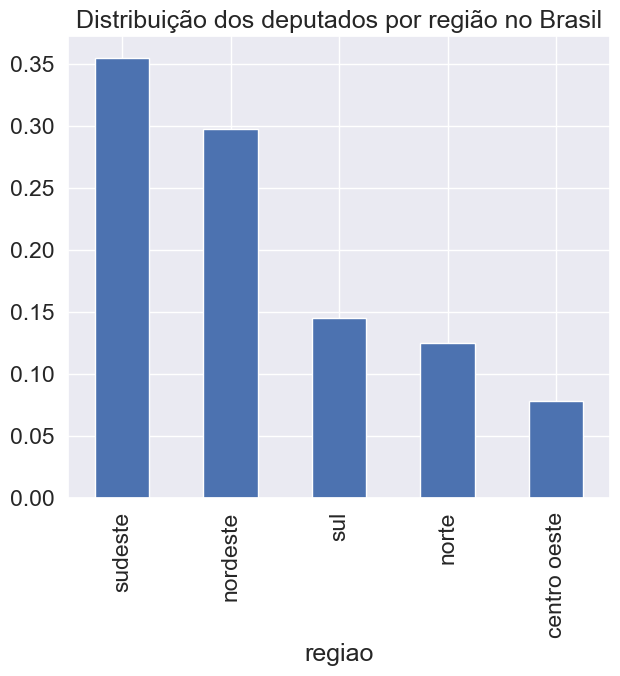

In [25]:
notas_dep.regiao.value_counts(1).plot.bar()
plt.title('Distribuição dos deputados por região no Brasil')
plt.show()

A maior parte da representação na câmara são de deputados da região Sudeste e Nordeste, abraçando juntas quase que 65% do total.

In [26]:
notas_dep.groupby(['regiao', 'ideologia'])[['avg_site1', 'nota_site2']].mean()

avg_site1  nota_site2
regiao       ideologia                       
centro oeste centro      3.619251    6.073636
             direita     3.279412    6.549500
             esquerda    5.185714    3.242857
nordeste     centro      2.511765    6.126563
             direita     2.556522    6.211160
             esquerda    3.990775    3.499545
norte        centro      2.485412    6.247200
             direita     2.970333    6.317826
             esquerda    4.188688    3.313846
sudeste      centro      2.871053    6.479474
             direita     3.139765    6.679200
             esquerda    4.704538    3.265714
sul          centro      2.755672    6.900000
             direita     3.179956    7.051852
             esquerda    4.477941    3.001250

Pelo agrupamento dos dados por região o comportamento ainda segue o mesmo padrão. Em todas as regiões os partidos com ideologias classificadas em Centro e Direita tem nota mais baixa no site 1 e as mais altas no site 2. E para ideologias de esquerda a nota é mais alta no site 1 e a mais baixa do site 2.

In [27]:
notas_dep.groupby(['regiao', 'ideologia'])[['ideologia']].count().unstack()

ideologia                 
ideologia       centro direita esquerda
regiao                                 
centro oeste        11      20        7
nordeste            32      69       44
norte               25      23       13
sudeste             38     100       35
sul                 28      27       16

A tabela acima mostra a distribuição de deputados por região para cada classificação de Ideologia do seu partido. E mostra que há maioria de partidos de Direita em 3 das 5 regiões, ficando atrás dos partidos de Centro apenas nas regiões Norte e Sul. Já a esquerda não é maioria em nenhuma região, e sendo minoria em 4 das 5 regiões, com excessão do Nordeste.
Isso mostra que a representatividade dos deputados do Brasil no ano de 2022 tem a Direita como sua representante majoritaria.

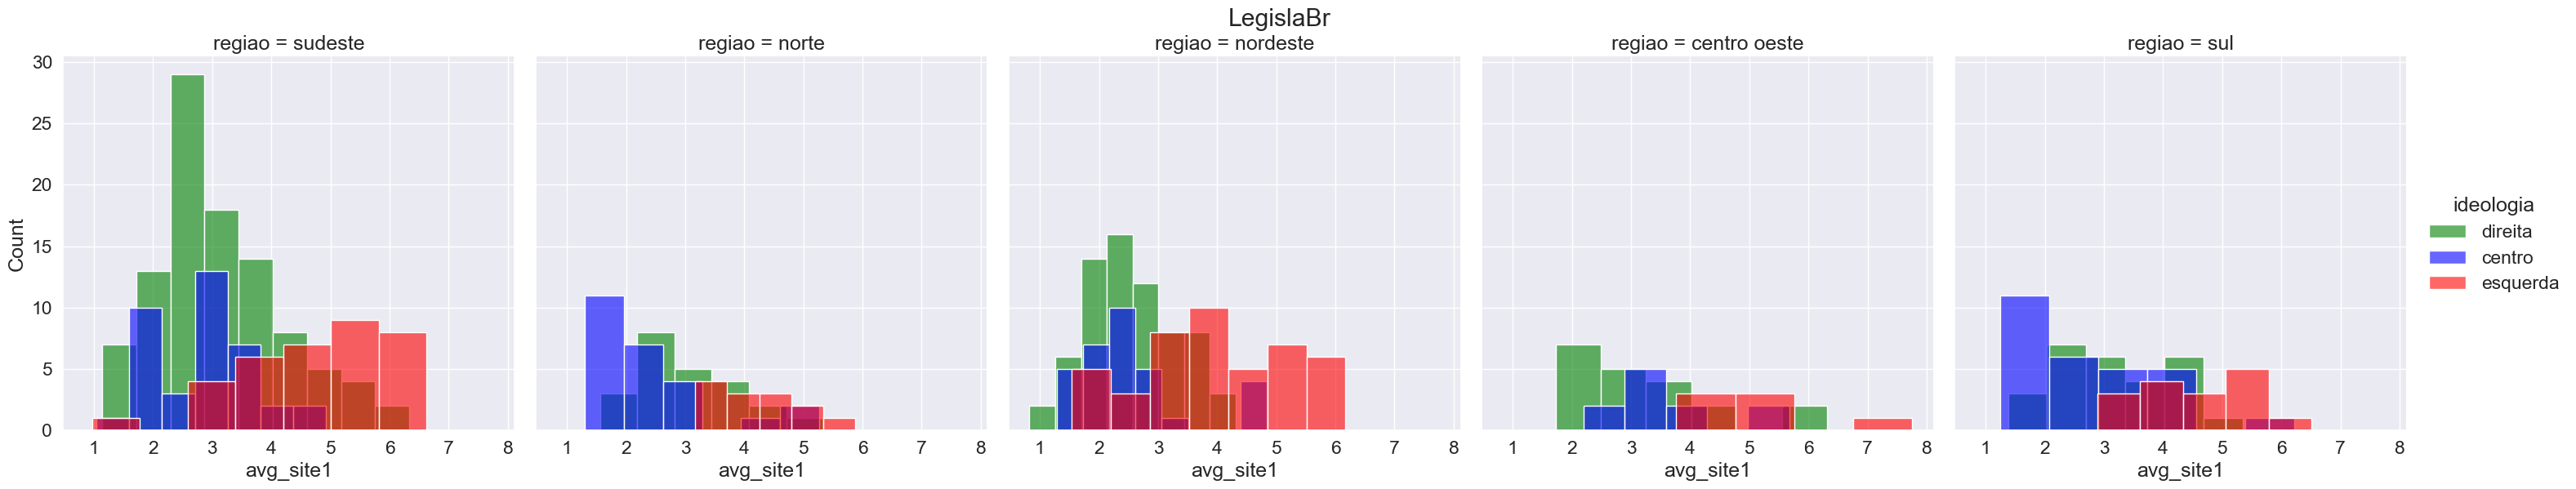

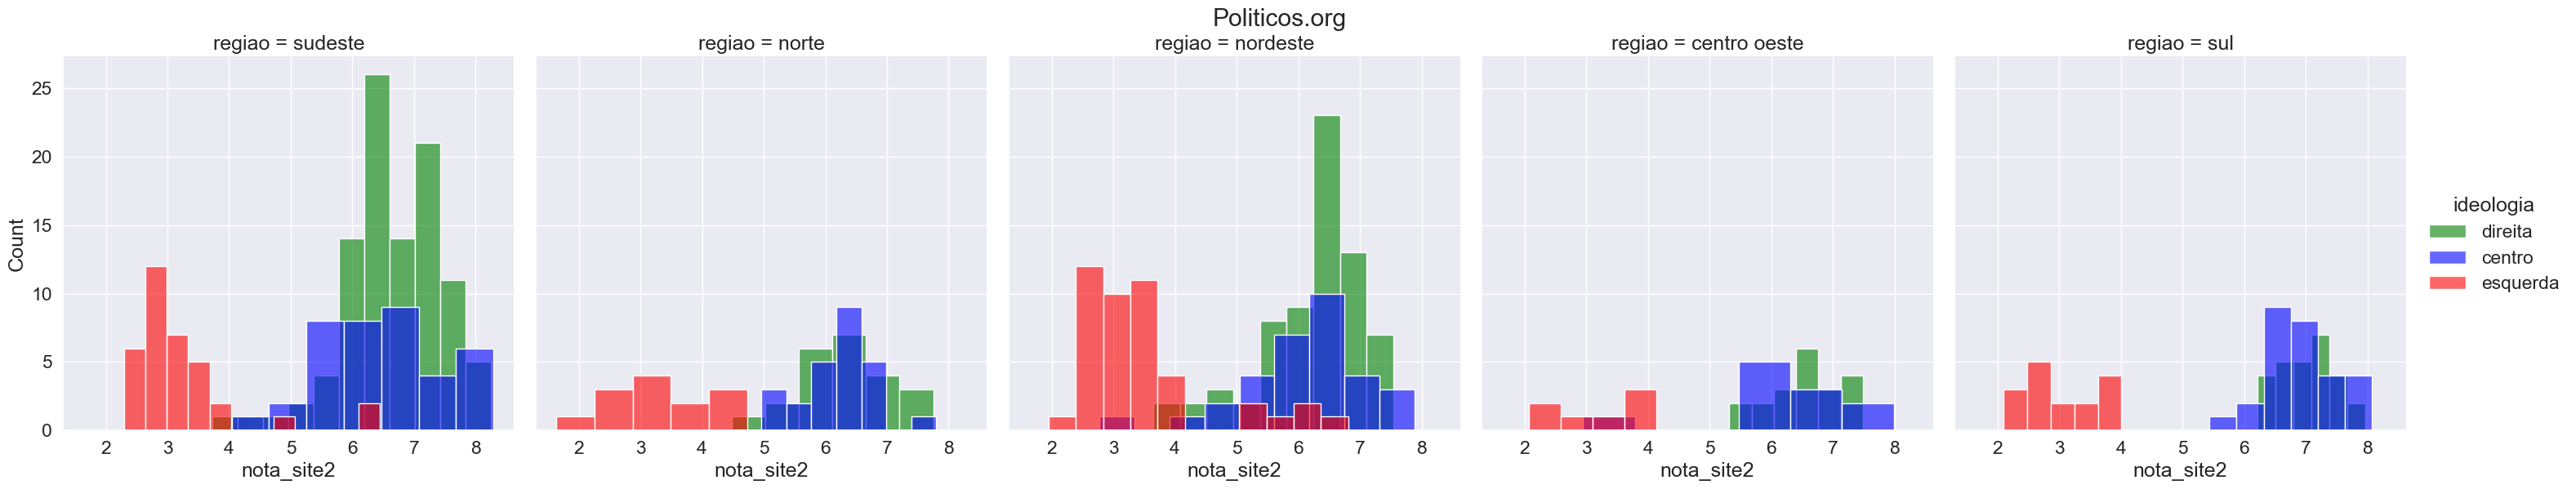

In [28]:
g = sns.FacetGrid(notas_dep, col="regiao", hue="ideologia", palette = ["green", "blue", "red"], height=6)
g.map(sns.histplot, "avg_site1", alpha=.6)
g.add_legend()
g.fig.suptitle('LegislaBr', y=1.01)

g2 = sns.FacetGrid(notas_dep, col="regiao", hue="ideologia", palette = ["green", "blue", "red"], height=6)
g2.map(sns.histplot, "nota_site2", alpha=.6)
g2.add_legend()
g2.fig.suptitle('Politicos.org', y=1.01)
plt.show()

Pode-se perceber a semelhança do comportamento das notas do Site 1 (LegislaBr) e do Site 2 (Politicos.org) quando olhamos para as notas divididas por região e quando olhamos para o comportamento da população dos dados. O site 1 tem notas maiores para partidos de Esquerda e o site 2 para partidos de Centro e Direita.

In [29]:
#salvando o arquivo
notas_dep.to_csv('I:/My Drive/Colab_Notebooks/Notas_deputados/datasets/processed_data/df_after_EAD.csv')